<a href="https://colab.research.google.com/github/AnanyaUp/Quantum-Machine-Learning/blob/main/QML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment-2**

In [ ]:
import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
print('train has {} rows and {} columns'.format(*train.shape))
print('test has {} rows and {} columns'.format(*test.shape))

train has 891 rows and 12 columns
test has 418 rows and 11 columns


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train = train.dropna(subset=["Embarked"])

In [ ]:
train = train.drop("Cabin", axis=1)

In [ ]:
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
print('There are {} different (unique) PassengerIds in the data'
    .format(train["PassengerId"].nunique()))
print('There are {} different (unique) names in the data'
    .format(train["Name"].nunique()))
print('There are {} different (unique) ticket numbers in the data'
    .format(train["Ticket"].nunique()))

There are 889 different (unique) PassengerIds in the data
There are 889 different (unique) names in the data
There are 680 different (unique) ticket numbers in the data


In [ ]:
train = train.drop("PassengerId", axis=1)
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    le.fit(train[col])
    train[col] = le.transform(train[col])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
print('The maximum age is {}'.format(train["Age"].max()))
print('The maximum fare is {}'.format(train["Fare"].max()))

The maximum age is 80.0
The maximum fare is 512.3292


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

print('The minimum value is {} and the maximum value is {}'
    .format(train.min(), train.max()))

The minimum value is 0.0 and the maximum value is 1.0


In [ ]:
from sklearn.model_selection import train_test_split

input_data = train[:, 1:8]
labels = train[:, 0]

train_input, test_input, train_labels, test_labels = train_test_split(
    input_data, labels, test_size = 0.2)

print('We have {} training and {} testing rows'.format(train_input.shape[0], test_input.shape[0]))
print('There are {} input columns'.format(train_input.shape[1]))

We have 711 training and 178 testing rows
There are 7 input columns


In [ ]:
import numpy as np
import os

if not os.path.exists('data'):
    os.makedirs('data')

with open('data/train.npy', 'wb') as f:
    np.save(f, train_input)
    np.save(f, train_labels)

with open('data/test.npy', 'wb') as f:
    np.save(f, test_input)
    np.save(f, test_labels)

# PQC Classifier

In [ ]:
import random
random.seed(a=None, version=2)

def classify(passenger):
    return random.randint(0, 1)

In [ ]:
def run(f_classify, x):
    return list(map(f_classify, x))

In [ ]:
result = run(classify, train_input)

In [ ]:
def evaluate(predictions, actual):
    correct = list(filter(
        lambda item: item[0] == item[1],
        list(zip(predictions,actual))
    ))
    return '{} correct predictions out of {}. Accuracy {:.0f} %' \
        .format(len(correct), len(actual), 100*len(correct)/len(actual))

print(evaluate(run(classify, train_input), train_labels))

347 correct predictions out of 711. Accuracy 49 %


In [ ]:
def predict_death(item):
    return 0

print(evaluate(run(predict_death, train_input), train_labels))

440 correct predictions out of 711. Accuracy 62 %


In [ ]:
from sklearn.metrics import confusion_matrix

predictions = run(predict_death, train_input)
confusion_matrix(train_labels, predictions)

array([[440,   0],
       [271,   0]])

In [ ]:
from sklearn.metrics import precision_score
print('The precision score of the predict_death classifier is {}'
    .format(precision_score(train_labels, predictions)))

The precision score of the predict_death classifier is 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

cm = confusion_matrix(train_labels, predictions)

print('The specificity score of the predict_death classifier is {:.2f}'.format(specificity(cm)))
print('The npv score of the predict_death classifier is {:.2f}'.format(npv(cm)))

The specificity score of the predict_death classifier is 1.00
The npv score of the predict_death classifier is 0.62


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

random_predictions = run(classify, train_input)
random_cm = confusion_matrix(train_labels, random_predictions)

print('The precision score of the random classifier is {:.2f}'
    .format(precision_score(train_labels, random_predictions)))
print('The recall score of the random classifier is {:.2f}'
    .format(recall_score(train_labels, random_predictions)))
print('The specificity score of the random classifier is {:.2f}'
    .format(specificity(random_cm)))
print('The npv score of the random classifier is {:.2f}'
    .format(npv(random_cm)))

The precision score of the random classifier is 0.37
The recall score of the random classifier is 0.49
The specificity score of the random classifier is 0.49
The npv score of the random classifier is 0.61


In [ ]:
def hypocrite(passenger, weight):
    return round(min(1,max(0,weight*0.5+random.uniform(0, 1))))

In [ ]:
w_predictions = run(lambda passenger: hypocrite(passenger, -0.5), train_input)
w_cm = confusion_matrix(train_labels, w_predictions)

print('The precision score of the hypocrite classifier is {:.2f}'
    .format(precision_score(train_labels, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'
    .format(recall_score(train_labels, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'
    .format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'
    .format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.32
The recall score of the hypocrite classifier is 0.21
The specificity score of the hypocrite classifier is 0.73
The npv score of the hypocrite classifier is 0.60


In [ ]:
cnt_steps = 40

steps = np.arange(0, cnt_steps, 1).tolist()

weights = list(map(
    lambda weight: round(weight, 2),
    np.arange(-1, 1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()
))

l_predictions = list(map(
    lambda step: run(
        lambda passenger: hypocrite(passenger, weights[step]),
        train_input
    ),
    steps
))

l_cm = list(map(
    lambda step: confusion_matrix(train_labels, l_predictions[step]),
    steps
))

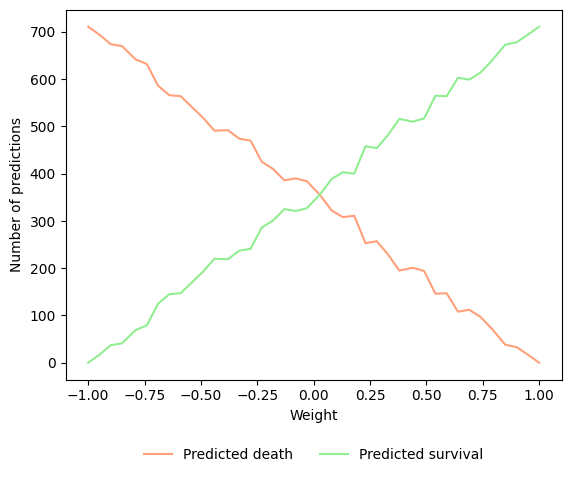

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

# Graph for number of predicted deaths
deaths, = plt.plot(
    weights,
    list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),
    'lightsalmon',
    label='Predicted death'
)

# Graph for number of predicted survivors
survivals, = plt.plot(
    weights,
    list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)),
    'lightgreen',
    label='Predicted survival'
)

plt.legend(handles=[deaths, survivals],loc='upper center',
    bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


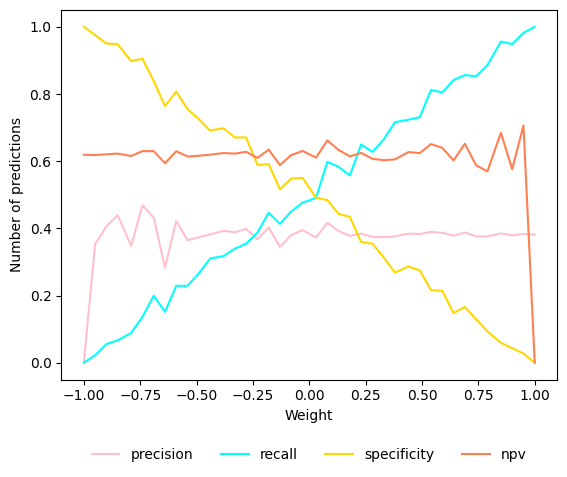

In [ ]:
l_precision = list(map(lambda step: precision_score(train_labels, l_predictions[step]),steps))
l_recall = list(map(lambda step: recall_score(train_labels, l_predictions[step]),steps))
l_specificity = list(map(lambda step: specificity(l_cm[step]),steps))
l_npv = list(map(lambda step: npv(l_cm[step]),steps))

m_precision, = plt.plot(weights, l_precision, 'pink', label="precision")
m_recall, = plt.plot(weights, l_recall, 'cyan', label="recall")
m_specificity, = plt.plot(weights, l_specificity, 'gold', label="specificity")
m_npv, = plt.plot(weights, l_npv, 'coral', label="npv")

plt.legend(
    handles=[m_precision, m_recall, m_specificity, m_npv],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    framealpha=0.0,
    ncol=4)

plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

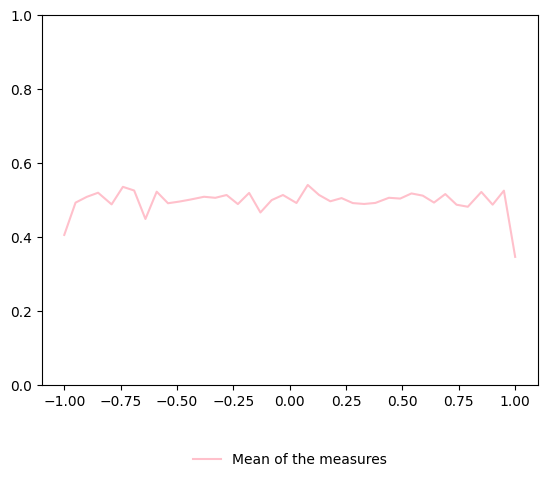

In [ ]:
l_mean = list(map(lambda step: sum(step)*0.25, zip(l_precision, l_recall, l_specificity, l_npv)))
m_mean, = plt.plot(weights, l_mean, 'pink', label="Mean of the measures")

plt.legend(handles=[m_mean],loc='upper center',
    bbox_to_anchor=(0.5, -0.15),framealpha=0.0)
plt.ylim(0, 1)
plt.show()

In [ ]:
def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))

In [ ]:
classifier_report(
    "Random PQC",
    run,
    classify,
    train_input,
    train_labels)

The precision score of the Random PQC classifier is 0.38
The recall score of the Random PQC classifier is 0.50
The specificity score of the Random PQC classifier is 0.50
The npv score of the Random PQC classifier is 0.62
The information level is: 0.50


# **Additional Tasks**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import Binarizer, KBinsDiscretizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# Random Seed
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Sample for feature engineering
combined_df = train_df.copy()

In [ ]:
# Drop Non-predictive features
combined_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True, errors='ignore')

In [ ]:
# Encode for all models
combined_df['Sex'] = combined_df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# Handle 'Embarked' missing values
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)
combined_df = pd.get_dummies(combined_df, columns=['Embarked'], drop_first=True, dtype=int)

/tmp/ipython-input-2400114251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)


#  Replace Missing Values using Iterative Imputer

In [ ]:
# Check missing values before imputation
print("Missing values BEFORE Imputation:\n", combined_df[['Age', 'Fare']].isnull().sum())

Missing values BEFORE Imputation:
 Age     177
Fare      0
dtype: int64


In [ ]:
# Define Imputer on all relevant numerical features
impute_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex']
imputer = IterativeImputer(max_iter=10, random_state=SEED)

In [ ]:
# Apply Imputation across the dataset
combined_df[impute_cols] = imputer.fit_transform(combined_df[impute_cols])

In [ ]:
# Check missing values after imputation
print("\nMissing values AFTER Imputation:\n", combined_df[['Age', 'Fare']].isnull().sum())


Missing values AFTER Imputation:
 Age     0
Fare    0
dtype: int64


# 4x4 Fold Cross-Validation

In [ ]:
# X & y Train Split
X = combined_df.drop('Survived', axis=1)
y = combined_df['Survived']

In [ ]:
# Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Define 4-Fold Cross-Validation
k_folds = KFold(n_splits=4, shuffle=True, random_state=SEED)

In [ ]:
# Logistic Regression
model_lr = LogisticRegression(max_iter=500, random_state=SEED)
scores_lr = cross_val_score(model_lr, X_scaled, y, cv=k_folds, scoring='accuracy')

print(f"Logistic Regression 4-Fold Scores: {scores_lr}")
print(f"Logistic Regression Average Accuracy: {scores_lr.mean():.4f}")

Logistic Regression 4-Fold Scores: [0.81165919 0.81165919 0.78475336 0.79279279]
Logistic Regression Average Accuracy: 0.8002


# Correlation with Target for Less Important Column

In [ ]:
# Pearson Correlation
df_corr = pd.concat([X, y], axis=1)
correlations = df_corr.corr(numeric_only=True)['Survived'].drop('Survived').sort_values(key=abs, ascending=True)

print("Feature Correlation with 'Survived':")
print(correlations.map('{:.4f}'.format))

least_important_feature = correlations.index[0]
print(f"\nThe least important feature is: {least_important_feature} (Correlation: {correlations.iloc[0]:.4f})")

Feature Correlation with 'Survived':
Embarked_Q     0.0037
SibSp         -0.0353
Age           -0.0525
Parch          0.0816
Embarked_S    -0.1497
Fare           0.2573
Pclass        -0.3385
Sex            0.5434
Name: Survived, dtype: object

The least important feature is: Embarked_Q (Correlation: 0.0037)


# Binarization & Discretization of Data

In [ ]:
# Binarization
median_fare = combined_df['Fare'].median()
threshold = median_fare
fare_values = combined_df['Fare'].values.reshape(-1, 1)

binarizer = Binarizer(threshold=threshold)
combined_df['HighFare'] = binarizer.fit_transform(fare_values)

print(f"Binarization: 'HighFare' (Threshold = Median Fare: {median_fare:.2f})")
print("HighFare Value Counts:\n", combined_df['HighFare'].value_counts())


Binarization: 'HighFare' (Threshold = Median Fare: 14.45)
HighFare Value Counts:
 HighFare
0.0    447
1.0    444
Name: count, dtype: int64


In [ ]:
# Discretization
age_values = combined_df['Age'].values.reshape(-1, 1)

# KBinsDiscretizer: 4 bins
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', subsample=None, random_state=SEED)
combined_df['AgeGroup'] = discretizer.fit_transform(age_values).astype(int)

print("\nDiscretization: 'AgeGroup' (4 Quantile Bins)")
print(combined_df[['Age', 'AgeGroup']].head())
print("\nAgeGroup Counts :\n", combined_df['AgeGroup'].value_counts().sort_index())



Discretization: 'AgeGroup' (4 Quantile Bins)
    Age  AgeGroup
0  22.0         1
1  38.0         3
2  26.0         1
3  35.0         2
4  35.0         2

AgeGroup Counts :
 AgeGroup
0    223
1    212
2    215
3    241
Name: count, dtype: int64


#  Classifiers

In [ ]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=SEED, max_depth=5)
scores_dtc = cross_val_score(dtc, X, y, cv=k_folds, scoring='accuracy')

In [ ]:
print(f"Decision Tree Average Accuracy: {scores_dtc.mean():.4f} (Scores: {scores_dtc})")

Decision Tree Average Accuracy: 0.8137 (Scores: [0.80269058 0.82511211 0.81165919 0.81531532])


In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
scores_knn = cross_val_score(knn, X_scaled, y, cv=k_folds, scoring='accuracy')

In [ ]:
print(f"K-Nearest Neighbors Average Accuracy: {scores_knn.mean():.4f} (Scores: {scores_knn})")

K-Nearest Neighbors Average Accuracy: 0.8103 (Scores: [0.80717489 0.79820628 0.82959641 0.80630631])


In [ ]:
# Support Vector Machine
svm = SVC(kernel='linear', random_state=SEED)
scores_svm = cross_val_score(svm, X_scaled, y, cv=k_folds, scoring='accuracy')

In [ ]:
print(f"Support Vector Machine Average Accuracy: {scores_svm.mean():.4f} (Scores: {scores_svm})")


Support Vector Machine Average Accuracy: 0.7879 (Scores: [0.78475336 0.78923767 0.76233184 0.81531532])
